<a href="https://colab.research.google.com/github/DrPaulaEkene/Image-Classification-with-Keras---Group-30/blob/main/Image_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####IMAGE CLASSIFICATION PROJECT


This notebook explores the ups and downs on the use of three models (VG16, MobileNet and a Generic Convolutional network) in image classification

In [ ]:
# Install visualkeras to enable us visualize the networks in 3D
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.3 MB/s eta 0:00:00


In [ ]:
#Make all necessary imports
# Core TensorFlow library for machine learning and neural network models.
import tensorflow as tf
# For our first Model, VGG16 model from Keras applications for deep learning models pre-trained on ImageNet dataset.
from tensorflow.keras.applications import VGG16
# Utilities for preprocessing images and decoding predictions.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# For our Second Model, Load MobileNet model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#For our third model, The ConvGen(Convolutional Generic) model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# OS module for operating system interactions, such as file path management.
import os
# PIL (Python Imaging Library) for image processing tasks.
import PIL
# Importing components from Keras for building and training models.
from tensorflow.keras import datasets, layers, models
# Utility to visualize the architecture of neural networks.
from keras.utils import plot_model
# Matplotlib for plotting, e.g., displaying images and graphs.
import matplotlib.pyplot as plt
# NumPy for numerical computing and handling large, multi-dimensional arrays and matrices.
import numpy as np
# Sklearn for evaluating our model
from sklearn.metrics import confusion_matrix
# import visualkeras
import visualkeras

In [ ]:
# Import the drive module from the google.colab package.
from google.colab import drive

# Mount the Google Drive to the specified mount point in the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


###DATA LOADING

In [ ]:
# Create all file paths and directories
data_directory = "/content/drive/MyDrive/image_classification"
train_directory = os.path.join(data_directory, "seg_train", "seg_train")
test_directory = os.path.join(data_directory, "seg_test", "seg_test")
image_size = (128, 128) #

In [ ]:
# Check the contents of the directories
print("Contents of seg_train:")
print(os.listdir('/content/drive/MyDrive/image_classification/seg_train'))

print("Contents of a category within seg_train:")
first_category = os.listdir('/content/drive/MyDrive/image_classification/seg_train')[0]
print(os.listdir(os.path.join('/content/drive/MyDrive/image_classification/seg_train', first_category)))


Contents of seg_train:
['seg_train']
Contents of a category within seg_train:
['glacier', 'mountain', 'sea', 'street', 'forest', 'buildings']


###PRE PROCESSING

In [ ]:
# Define a function to load and preprocess data from a given directory.
def load_and_preprocess_data(directory, image_size):
    data = []  # Initialize a list to store image data
    labels = []  # Initialize a list to store image labels
    for category in os.listdir(directory):
        category_folder = os.path.join(directory, category)  # To get the full path to the category folder
        if not os.path.isdir(category_folder):  # Skip if not a directory
            continue
        label = category
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)  # To get the full path to the image
            if not os.path.isfile(image_path) or not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            # Load and preprocess the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
            # Convert the image to a numpy array and normalize it
            image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.0
            data.append(image_array)  # Append the processed image data to the data list
            labels.append(label)  # Append the label to the labels list
    return np.array(data), np.array(labels)  # Convert the lists to numpy arrays for further processing in TensorFlow

# Load Train and Test data
train_images, train_labels = load_and_preprocess_data(train_directory, image_size)
test_images, test_labels = load_and_preprocess_data(test_directory, image_size)

print(train_images)

[[[[0.04313726 0.10588235 0.20392157]
   [0.04705882 0.10980392 0.20784314]
   [0.04705882 0.10980392 0.20784314]
   ...
   [0.05098039 0.03137255 0.01960784]
   [0.07058824 0.05098039 0.03921569]
   [0.2901961  0.27058825 0.25882354]]

  [[0.03921569 0.10196079 0.2       ]
   [0.04313726 0.10588235 0.20392157]
   [0.04313726 0.10588235 0.20392157]
   ...
   [0.06666667 0.05098039 0.03921569]
   [0.01568628 0.         0.        ]
   [0.25490198 0.23921569 0.22745098]]

  [[0.04705882 0.10980392 0.2       ]
   [0.05098039 0.11372549 0.20392157]
   [0.05098039 0.11372549 0.20392157]
   ...
   [0.03529412 0.03137255 0.02352941]
   [0.04705882 0.03137255 0.02745098]
   [0.1764706  0.17254902 0.16470589]]

  ...

  [[0.18431373 0.16470589 0.14901961]
   [0.23529412 0.21568628 0.2       ]
   [0.16470589 0.14509805 0.13333334]
   ...
   [0.11372549 0.10980392 0.10196079]
   [0.17254902 0.16862746 0.16078432]
   [0.19215687 0.1882353  0.18039216]]

  [[0.20392157 0.18431373 0.17254902]
   [0.2

In [ ]:
# Print the shape of the data and labels arrays
print("Data shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

Data shape: (14044, 128, 128, 3)
Labels shape: (14044,)


In [ ]:
# Distribution of Data points among classes
import pandas as pd
freq = pd.Series(train_labels).value_counts()
print(freq)

mountain     2512
glacier      2414
street       2382
sea          2274
forest       2271
buildings    2191
dtype: int64


In [ ]:
#  Print list of unique labels, class_names
class_names = unique_labels = np.unique(train_labels)
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
#Convert class to index and encode the test and train labels
class_to_index = {name: index for index, name in enumerate(class_names)}
index_to_class = {index: name for name, index in class_to_index.items()}

train_labels_encoded = np.array([class_to_index[label] for label in train_labels])
test_labels_encoded = np.array([class_to_index[label] for label in test_labels])

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


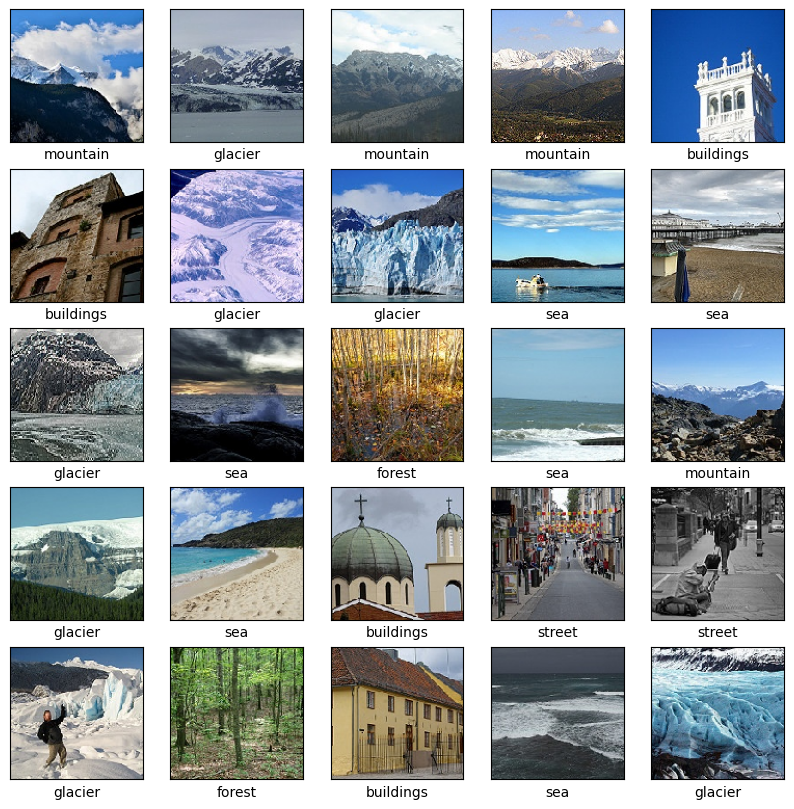

In [ ]:
label_to_index = {label: index for index, label in enumerate(class_names)}

# Select 25 random image indices
random_indices = np.random.choice(len(train_images), size=25, replace=False)

plt.figure(figsize=(10,10))
for idx, random_index in enumerate(random_indices):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_index])  # Use the random_index here
    label_index = label_to_index[train_labels[random_index]]  # And here
    plt.xlabel(class_names[label_index])
plt.show()


###MODEL DEFINITION

####Load the Model 1- VGG16

In [ ]:
# Load the VGG16 model pre-trained weights on ImageNet dataset.
# input_shape=(128, 128, 3)
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Iterate through each layer in the base model.
for layer in VGG_model.layers:
        layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


### Load the Model 2 Mobile Net

In [ ]:
# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

num_classes = len(class_names)
# Add custom layers on top of MobileNet
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
# Initiate Model 3 Conv_Gen(Convolutional Generic) from the scratch
Conv_Gen_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

Conv_Gen_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Iterate through each layer in the model.
for layer in Conv_Gen_model.layers:
        layer.trainable = False

###Visualize the 3 models

In [ ]:
import visualkeras

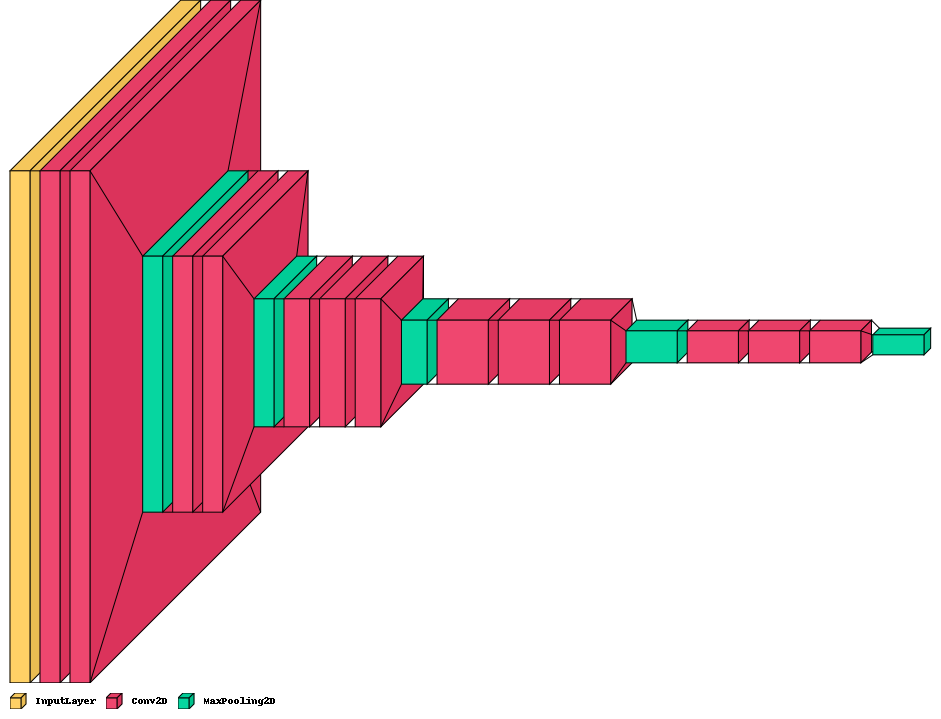

In [ ]:
# Let's visualize the 3 models
# visualize the VGG
visualkeras.layered_view(VGG_model,legend=True)

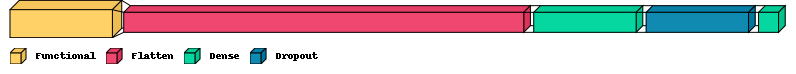

In [ ]:
# visualise the Mobile_Net
visualkeras.layered_view(model2,legend=True)

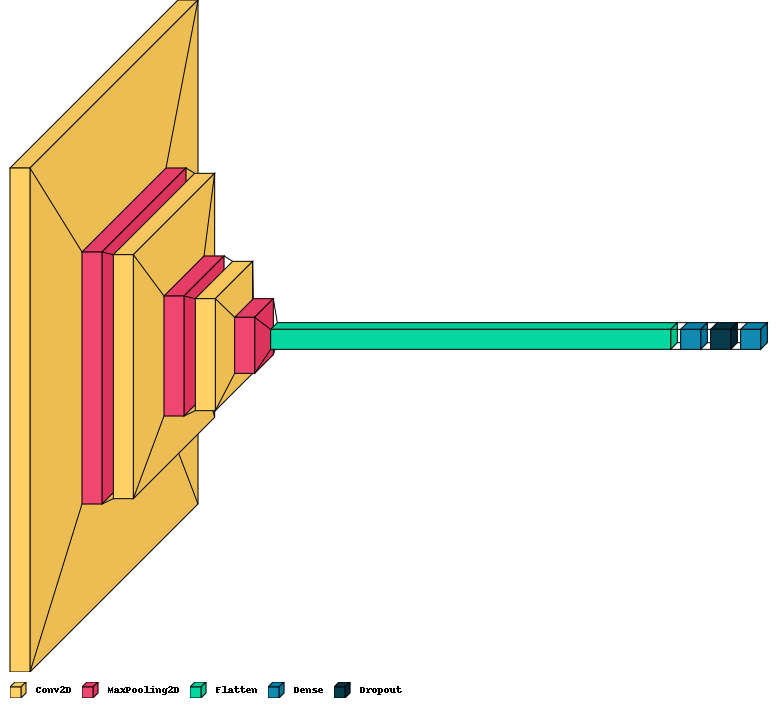

In [ ]:
#visualise the generic model, Conv_Gen
# Let's visualize the model
visualkeras.layered_view(Conv_Gen_model,legend=True)

####Plot the 3 models

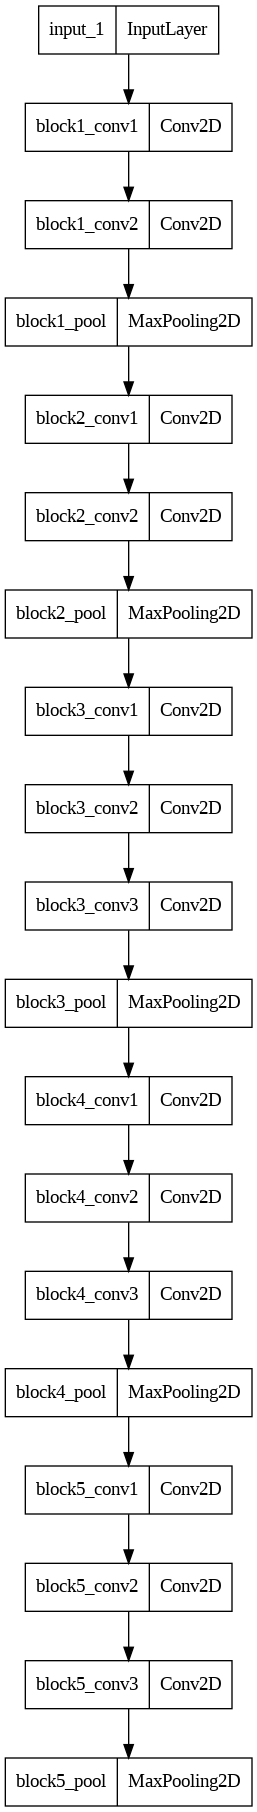

In [ ]:
plot_model(VGG_model)

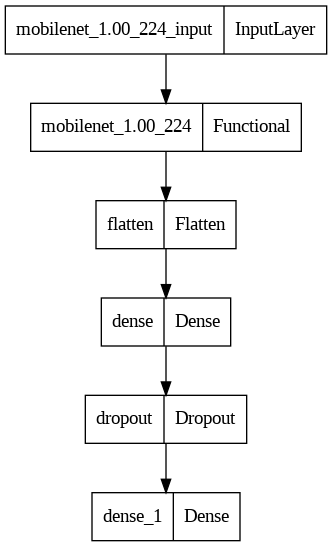

In [ ]:
# Plot the Mobile Net
plot_model(model2)

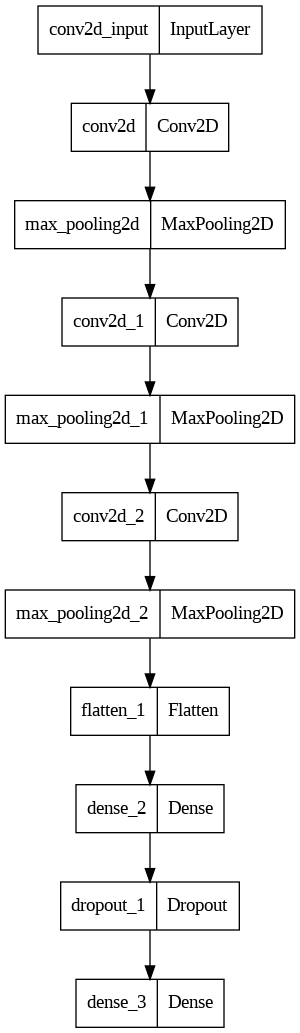

In [ ]:
###Plot the Generic model
plot_model(Conv_Gen_model)

#### Model Summaries

In [ ]:
# `num_classes` will hold the total number of classes.
num_classes = len(class_names)

# Initialize a Sequential model.
model1 = models.Sequential()

# Add the pre-trained VGG16 model as the base of your model.
# This includes all the convolutional layers of VGG16, pre-trained on ImageNet.
model1.add(VGG_model)

# Flatten the output of the VGG16 model because dense layers expect 1D inputs.
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5)) # Add a Dropout layer to prevent overfitting
# Final Dense layer for classification. The number of neurons equals the number of classes,
# with a softmax activation function to output probabilities for each class.
model1.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Do same for the Mobile Net model
num_classes = len(class_names)

# Initialize a Sequential model
model2 = models.Sequential()

# Load the MobileNet model, pre-trained on ImageNet
MNet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add the pre-trained MobileNet model as the base of your new model
model2.add(MNet_model)

# Add the rest of the layers
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5)) # Dropout to prevent overfitting
model2.add(layers.Dense(num_classes, activation='softmax')) # Final classification layer

###Displaying the architecture of the models :

In [ ]:
# Displaying the VGG model's architecture.
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 16813638 (64.14 MB)
Trainable params: 2098950 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Displaying the Mobile Net model's architecture.
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               12845312  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 16075718 (61.32 MB)
Trainable params: 16053830 (61.24 MB)
Non-trainable params: 21888 (85.50 KB)
_________

In [ ]:
# Displaying the Conv_Gen Model's architecture.
Conv_Gen_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

###TRAINING OF MODELS

### Compile and train the models

In [ ]:
# Compiling and training the VGG16, model 1
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Train the VGG16
history_VGG = model1.fit(train_images, train_labels_encoded , epochs=15,
                    validation_data=(test_images, test_labels_encoded))

Epoch 1/15
439/439 [==============================] - 16s 26ms/step - loss: 0.5694 - accuracy: 0.7925 - val_loss: 0.3698 - val_accuracy: 0.8664
Epoch 2/15
439/439 [==============================] - 9s 19ms/step - loss: 0.4186 - accuracy: 0.8510 - val_loss: 0.3598 - val_accuracy: 0.8664
Epoch 3/15
439/439 [==============================] - 9s 20ms/step - loss: 0.3710 - accuracy: 0.8624 - val_loss: 0.3401 - val_accuracy: 0.8757
Epoch 4/15
439/439 [==============================] - 9s 20ms/step - loss: 0.3368 - accuracy: 0.8798 - val_loss: 0.3209 - val_accuracy: 0.8807
Epoch 5/15
439/439 [==============================] - 9s 19ms/step - loss: 0.3057 - accuracy: 0.8905 - val_loss: 0.3325 - val_accuracy: 0.8831
Epoch 6/15
439/439 [==============================] - 9s 20ms/step - loss: 0.2924 - accuracy: 0.8888 - val_loss: 0.3439 - val_accuracy: 0.8744
Epoch 7/15
439/439 [==============================] - 9s 19ms/step - loss: 0.2738 - accuracy: 0.8977 - val_loss: 0.3201 - val_accuracy: 0.884

In [ ]:
# Compiling and training the MobileNet, model2
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Image size for mobile Net
image_size = (224, 224)

# Define number of classes
num_classes = len(class_names)

# Define the data generators with the target size expected by MobileNet
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'  # Labels will be one-hot encoded
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'  # Labels will be one-hot encoded
)

# Train the model using the train generator
history_MNet = model2.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Found 14044 images belonging to 6 classes.
Found 3010 images belonging to 6 classes.
Epoch 1/15
438/438 [==============================] - 99s 190ms/step - loss: 1.3671 - accuracy: 0.7863 - val_loss: 0.9548 - val_accuracy: 0.6985
Epoch 2/15
438/438 [==============================] - 70s 160ms/step - loss: 0.4619 - accuracy: 0.8653 - val_loss: 0.4048 - val_accuracy: 0.8667
Epoch 3/15
438/438 [==============================] - 71s 162ms/step - loss: 0.3931 - accuracy: 0.8857 - val_loss: 0.4210 - val_accuracy: 0.8554
Epoch 4/15
438/438 [==============================] - 71s 161ms/step - loss: 0.3409 - accuracy: 0.8941 - val_loss: 0.7650 - val_accuracy: 0.7759
Epoch 5/15
438/438 [==============================] - 73s 167ms/step - loss: 0.3533 - accuracy: 0.8970 - val_loss: 0.3797 - val_accuracy: 0.8740
Epoch 6/15
438/438 [==============================] - 71s 162ms/step - loss: 0.3148 - accuracy: 0.9056 - val_loss: 0.5634 - val_accuracy: 0.8225
Epoch 7/15
438/438 [=========================

In [ ]:
# Train the model using the train generator
history_MNet = model2.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=test_generator.n // test_generator.batch_size
)

Epoch 1/15
438/438 [==============================] - 75s 171ms/step - loss: 0.1973 - accuracy: 0.9426 - val_loss: 0.3857 - val_accuracy: 0.9046
Epoch 2/15
438/438 [==============================] - 73s 167ms/step - loss: 0.1474 - accuracy: 0.9552 - val_loss: 1.1476 - val_accuracy: 0.8311
Epoch 3/15
438/438 [==============================] - 73s 166ms/step - loss: 0.1685 - accuracy: 0.9515 - val_loss: 0.6791 - val_accuracy: 0.8860
Epoch 4/15
438/438 [==============================] - 70s 160ms/step - loss: 0.1295 - accuracy: 0.9597 - val_loss: 0.4797 - val_accuracy: 0.8973
Epoch 5/15
438/438 [==============================] - 74s 170ms/step - loss: 0.1126 - accuracy: 0.9686 - val_loss: 1.0584 - val_accuracy: 0.8614
Epoch 6/15
438/438 [==============================] - 72s 165ms/step - loss: 0.1362 - accuracy: 0.9620 - val_loss: 0.8291 - val_accuracy: 0.8700
Epoch 7/15
438/438 [==============================] - 70s 160ms/step - loss: 0.1301 - accuracy: 0.9615 - val_loss: 0.4778 - val_ac

In [ ]:
# Compile and train the Generic_Model
history_Conv_Gen = Conv_Gen_model.fit(train_images, train_labels_encoded , epochs=15,
                    validation_data=(test_images, test_labels_encoded))

Epoch 1/15
439/439 [==============================] - 8s 13ms/step - loss: 1.1920 - accuracy: 0.5229 - val_loss: 0.8878 - val_accuracy: 0.6641
Epoch 2/15
439/439 [==============================] - 4s 9ms/step - loss: 0.8941 - accuracy: 0.6637 - val_loss: 0.6285 - val_accuracy: 0.7787
Epoch 3/15
439/439 [==============================] - 4s 9ms/step - loss: 0.7389 - accuracy: 0.7289 - val_loss: 0.5661 - val_accuracy: 0.8063
Epoch 4/15
439/439 [==============================] - 4s 9ms/step - loss: 0.6478 - accuracy: 0.7655 - val_loss: 0.5200 - val_accuracy: 0.8246
Epoch 5/15
439/439 [==============================] - 4s 9ms/step - loss: 0.5742 - accuracy: 0.7954 - val_loss: 0.5147 - val_accuracy: 0.8239
Epoch 6/15
439/439 [==============================] - 4s 9ms/step - loss: 0.5284 - accuracy: 0.8087 - val_loss: 0.5156 - val_accuracy: 0.8143
Epoch 7/15
439/439 [==============================] - 4s 9ms/step - loss: 0.4746 - accuracy: 0.8274 - val_loss: 0.5294 - val_accuracy: 0.8186
Epoch

###EVALUATION

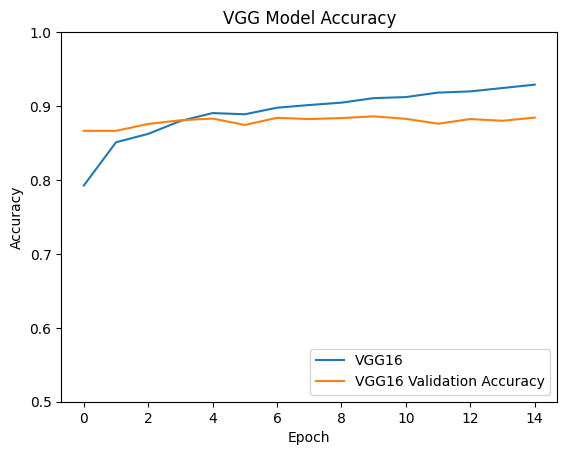

In [ ]:
# Plot training & validation accuracy values for the VGG16
plt.plot(history_VGG.history['accuracy'], label='VGG16')
plt.plot(history_VGG.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Adjust the y-axis limits as needed
plt.legend(loc='lower right')
plt.show()


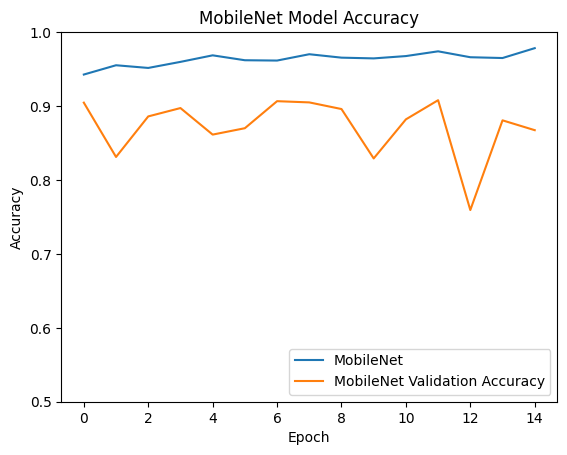

In [ ]:
# Plot training & validation accuracy values for the MobileNet
plt.plot(history_MNet.history['accuracy'], label='MobileNet')
plt.plot(history_MNet.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.title('MobileNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Adjust the y-axis limits as needed
plt.legend(loc='lower right')
plt.show()

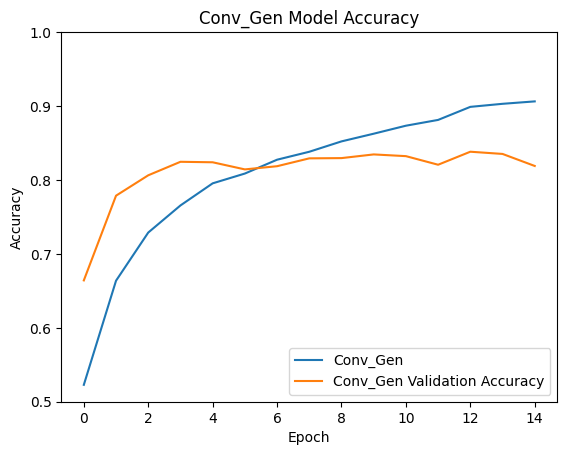

In [ ]:
# Plot training & validation accuracy values for the Conv_Gen
plt.plot(history_Conv_Gen.history['accuracy'], label='Conv_Gen')
plt.plot(history_Conv_Gen.history['val_accuracy'], label='Conv_Gen Validation Accuracy')
plt.title('Conv_Gen Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Adjust the y-axis limits as needed
plt.legend(loc='lower right')
plt.show()

In [ ]:
## Calculate loss and accuracy scores for the three models
# VGG
test_loss_VG, test_acc_VG = model1.evaluate(test_images,  test_labels_encoded, verbose=2)

#MobileNet,using the test generator
test_loss_MNet, test_acc_MNet = model2.evaluate(test_generator, verbose=2)

#Conv_Gen
test_loss_Conv, test_acc_Conv = Conv_Gen_model.evaluate(test_images,  test_labels_encoded, verbose=2)

95/95 - 1s - loss: 0.4042 - accuracy: 0.8844 - 1s/epoch - 15ms/step
95/95 - 12s - loss: 1.0638 - accuracy: 0.8671 - 12s/epoch - 126ms/step
95/95 - 0s - loss: 0.7106 - accuracy: 0.8189 - 416ms/epoch - 4ms/step


###PREDICTION

95/95 [==============================] - 0s 4ms/step


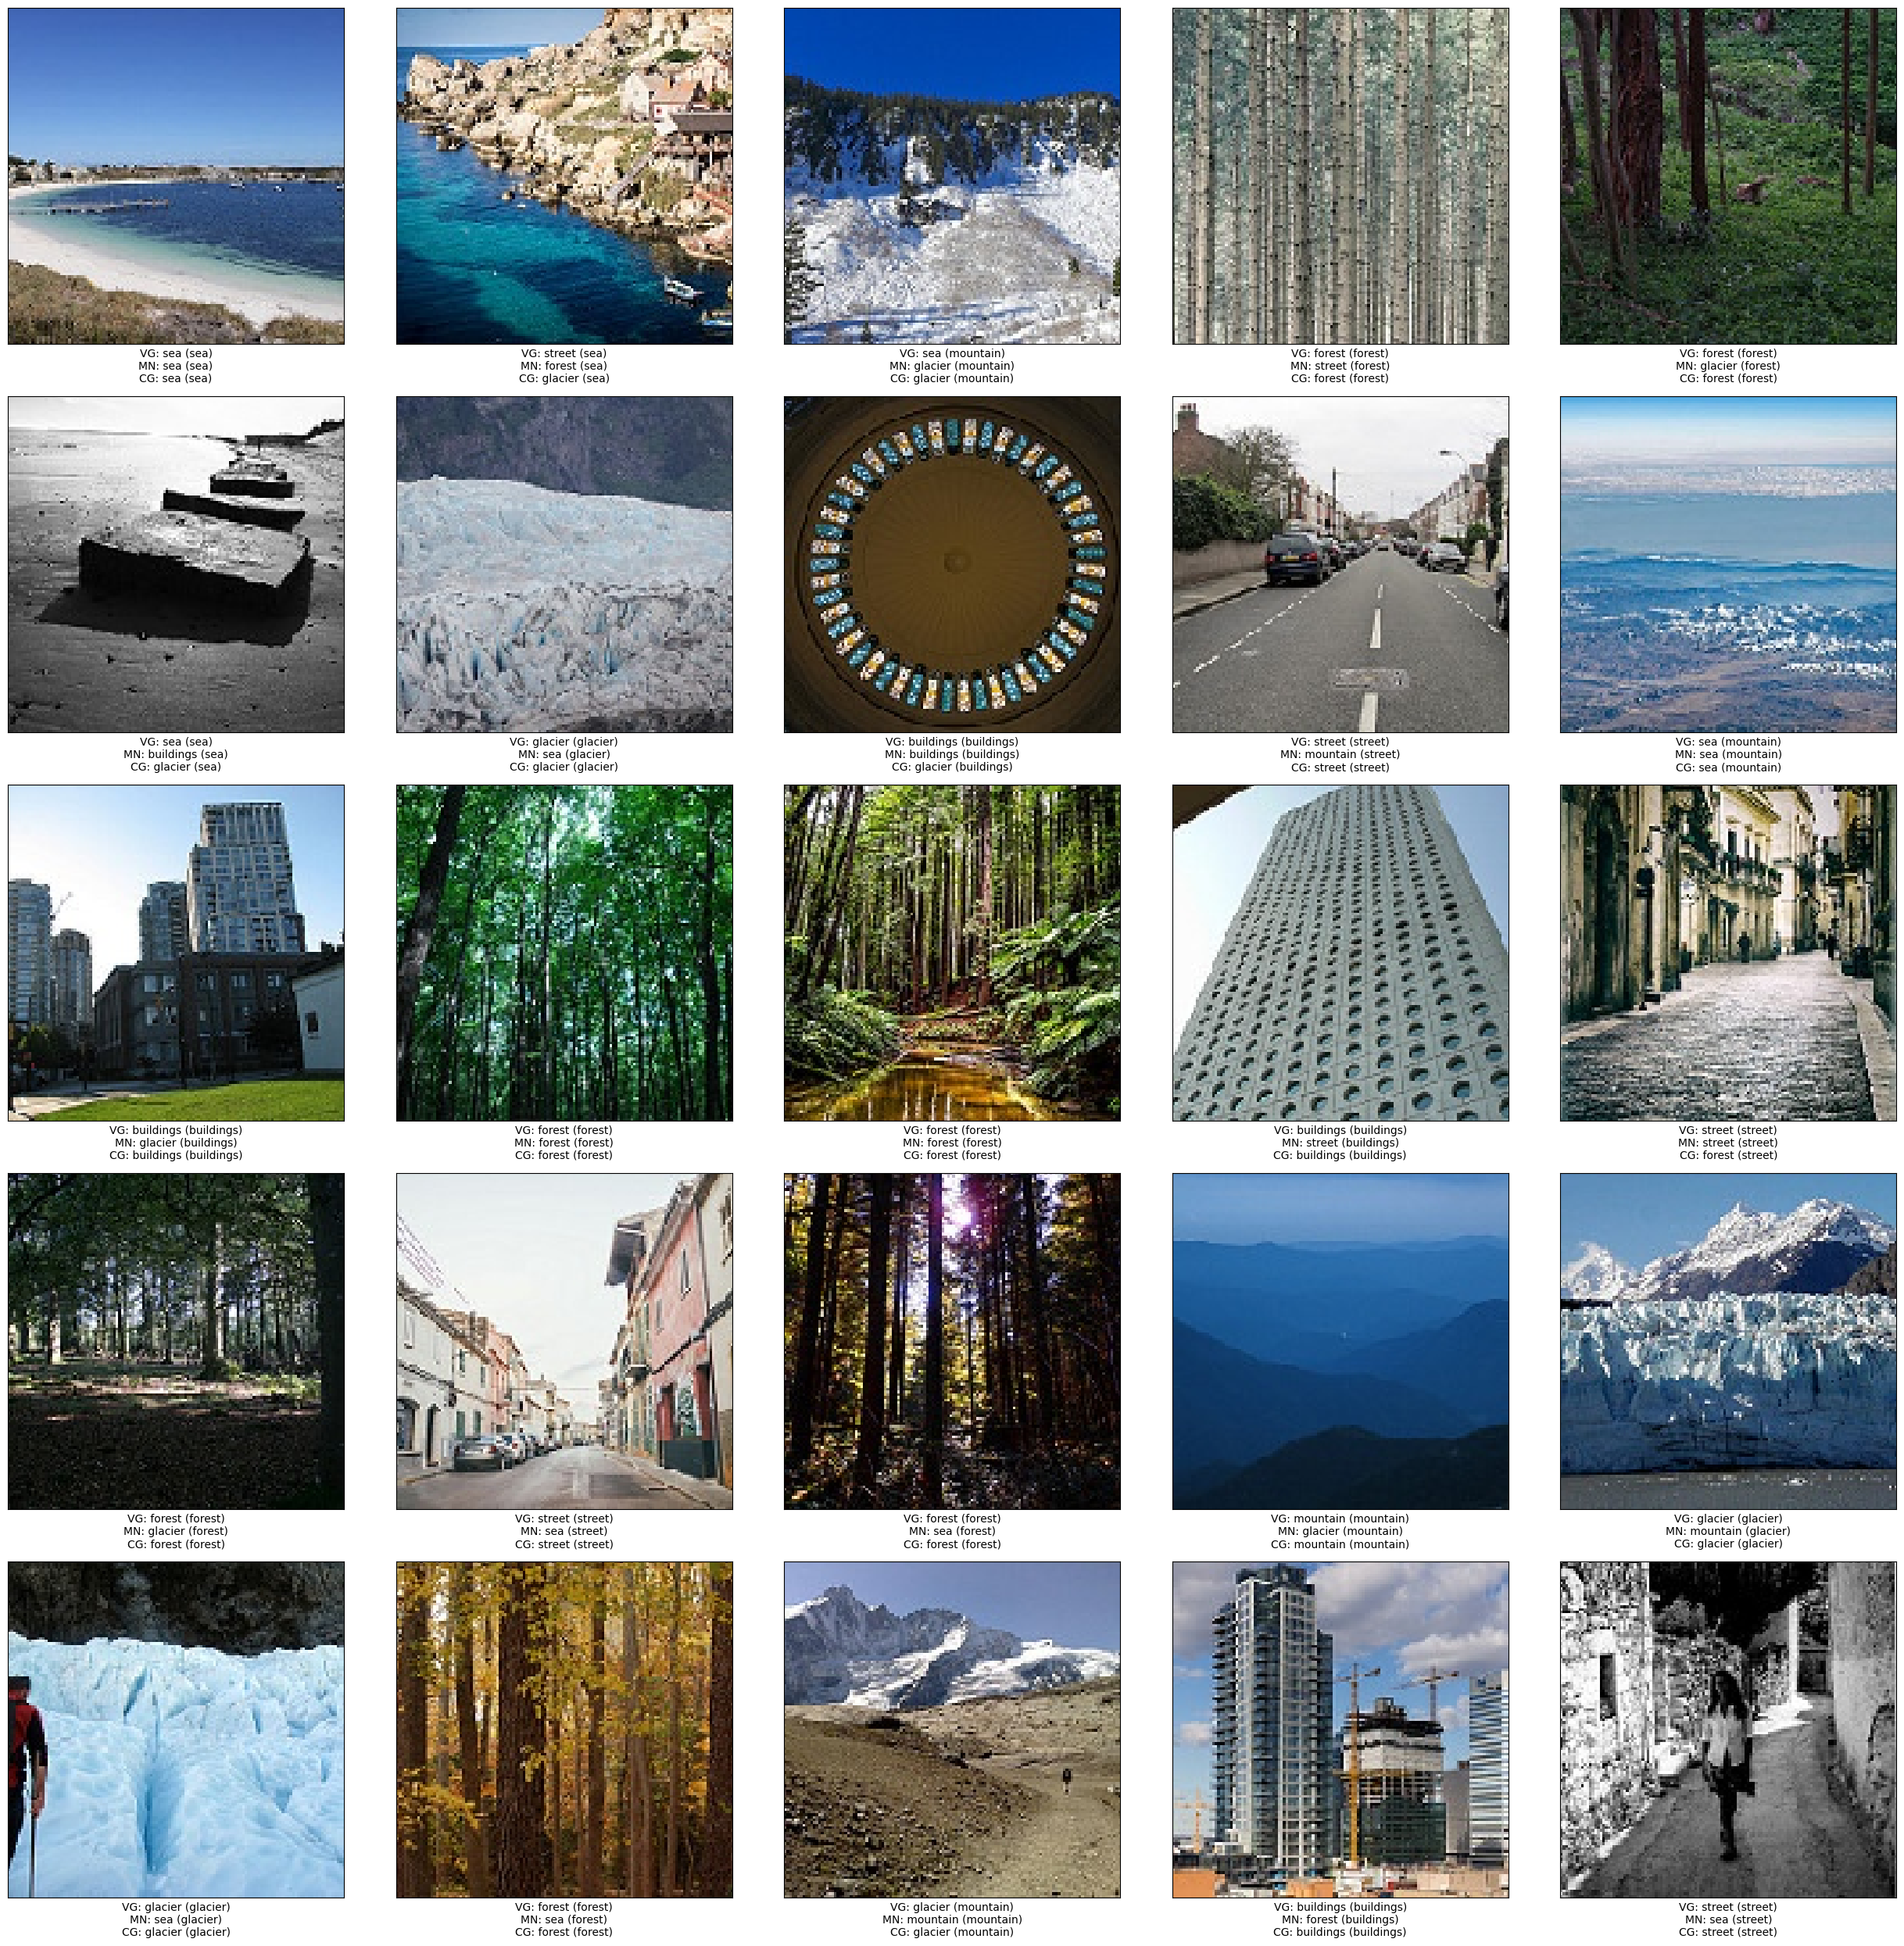

In [ ]:
# Get predictions for validation images for the three models
VG_predicted_scores = model1.predict(test_images)
VG_predicted_labels = np.argmax(VG_predicted_scores, axis=1)

MNet_predicted_scores = model2.predict(test_generator)
MNet_predicted_labels = np.argmax(MNet_predicted_scores, axis=1)

CG_predicted_scores = Conv_Gen_model.predict(test_images)
CG_predicted_labels = np.argmax(CG_predicted_scores, axis=1)


# Convert numerical labels back to class names
index_to_label = {index: label for label, index in label_to_index.items()}

# Select 25 random image indices from the validation set
random_indices = np.random.choice(len(test_images), size=25, replace=False)

plt.figure(figsize=(25, 25))

for idx, random_index in enumerate(random_indices):
    plt.subplot(5, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_index])

    # True label for the current image
    true_label = test_labels[random_index]

    # Get predicted labels from each model
    VG_predicted_label = index_to_class[VG_predicted_labels[random_index]]
    MNet_predicted_label = index_to_class[MNet_predicted_labels[random_index]]
    CG_predicted_label = index_to_class[CG_predicted_labels[random_index]]

    # To check if each prediction matches the true label
    VG_color = 'green' if VG_predicted_label == true_label else 'red'
    MNet_color = 'green' if MNet_predicted_label == true_label else 'red'
    CG_color = 'green' if CG_predicted_label == true_label else 'red'

    # Combine the label information
    label_info = (f"VG: {VG_predicted_label} ({true_label})\n"
                  f"MN: {MNet_predicted_label} ({true_label})\n"
                  f"CG: {CG_predicted_label} ({true_label})")

    # Plot predicted labels from all models and the true label
    plt.xlabel(label_info, color='black')

plt.tight_layout()
plt.show()


In [ ]:
# Convert numerical labels back to class names
VG_predicted_labels = [index_to_class[index] for index in VG_predicted_labels]
MNet_predicted_labels = [index_to_class[index] for index in MNet_predicted_labels]
CG_predicted_labels = [index_to_class[index] for index in CG_predicted_labels]


###Generate the confusion matrix for the three models

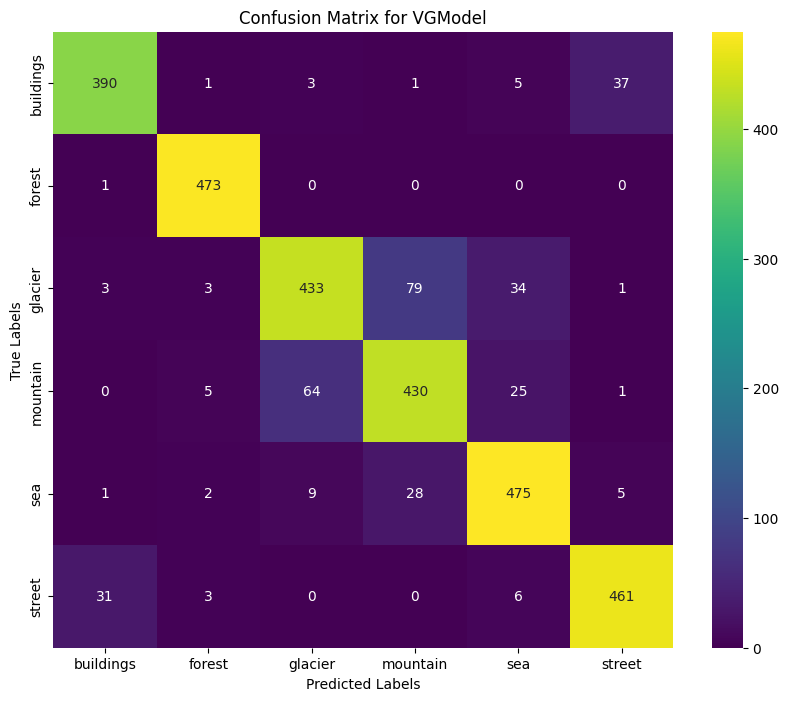

In [ ]:
# Generate the confusion matrix for the VG16
import seaborn as sns
VG_conf_matrix = confusion_matrix(test_labels, VG_predicted_labels)

# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(VG_conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[index_to_label[i] for i in range(len(index_to_label))],
            yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.title('Confusion Matrix for VGModel')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


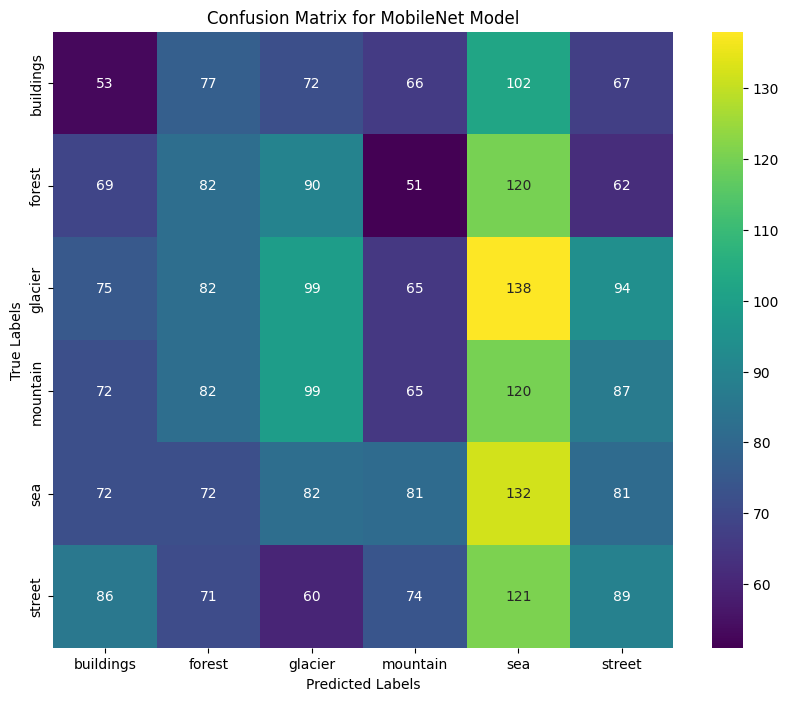

In [ ]:
# Generate the confusion matrix for the Mobile Net
MNet_conf_matrix = confusion_matrix(test_labels, MNet_predicted_labels)

# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(MNet_conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[index_to_label[i] for i in range(len(index_to_label))],
            yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.title('Confusion Matrix for MobileNet Model')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

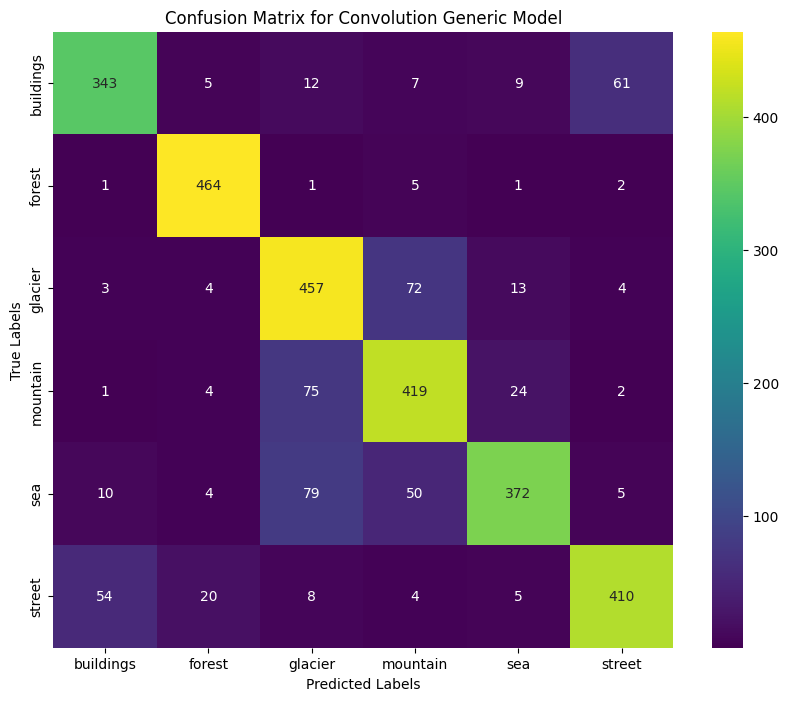

In [ ]:
# Generate the confusion matrix for the Conv_Gen Model
CG_conf_matrix = confusion_matrix(test_labels, CG_predicted_labels)

# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(CG_conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[index_to_label[i] for i in range(len(index_to_label))],
            yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.title('Confusion Matrix for Convolution Generic Model')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

EVALUATION OF MODELS

###Calculate and plot Sensitivity and Specificity for the three models

In [ ]:
def calculate_sensitivity_specificity(conf_matrix):
    sensitivity = []
    specificity = []

    # Calculate sensitivity and specificity for each class
    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - TP
        FP = sum(conf_matrix[:, i]) - TP
        TN = sum(conf_matrix) - (TP + FN + FP)

        sensitivity_i = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity_i = TN / (TN + FP) if (TN + FP) != 0 else 0

        sensitivity.append(sensitivity_i)
        specificity.append(specificity_i)

    return np.array(sensitivity), np.array(specificity)




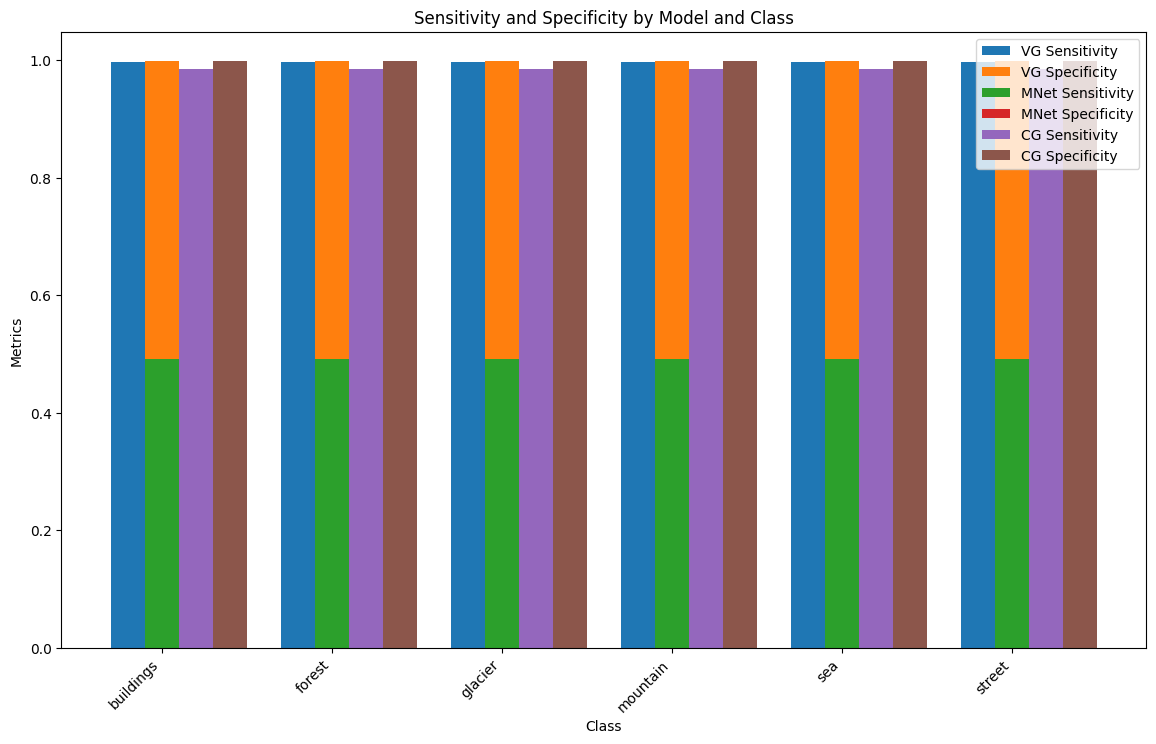

In [ ]:
def plot_combined_metrics(sensitivities, specificities, class_labels, models):
    x = np.arange(len(class_labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 8))

    for i, model in enumerate(models):
        sens_bars = ax.bar(x - width + i*width, sensitivities[i], width, label=f'{model} Sensitivity')
        spec_bars = ax.bar(x + i*width, specificities[i], width, label=f'{model} Specificity')

    ax.set_xlabel('Class')
    ax.set_ylabel('Metrics')
    ax.set_title('Sensitivity and Specificity by Model and Class')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels, rotation=45, ha="right")
    ax.legend()

    plt.show()

class_labels = [index_to_label[i] for i in range(len(index_to_label))]

# Combine sensitivities and specificities for plotting
sensitivities = [sensitivity_VG, sensitivity_MNet, sensitivity_CG]
specificities = [specificity_VG, specificity_MNet, specificity_CG]
models = ['VG', 'MNet', 'CG']

plot_combined_metrics(sensitivities, specificities, class_labels, models)
